# Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

# Loading dataset

In [2]:
boston = load_boston()

# Data preparation

In [3]:
df_X = pd.DataFrame(boston['data'])
df_y = pd.DataFrame(boston['target'])

df_y = df_y.rename(columns={0: 'price'})
df = df_X.join(df_y)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df_X.shape

(506, 13)

In [5]:
df = preprocessing.normalize(df)

df = pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000013,0.035955,0.004614,0.0,0.001075,0.013134,0.130238,0.008170,0.001998,0.591265,0.030562,0.792814,0.009948,0.047940
1,0.000058,0.000000,0.014961,0.0,0.000992,0.013588,0.166966,0.010511,0.004232,0.512112,0.037668,0.839907,0.019342,0.045709
2,0.000058,0.000000,0.015133,0.0,0.001004,0.015379,0.130778,0.010632,0.004281,0.517974,0.038099,0.840809,0.008626,0.074272
3,0.000071,0.000000,0.004772,0.0,0.001003,0.015319,0.100257,0.013270,0.006567,0.485964,0.040935,0.863856,0.006436,0.073114
4,0.000150,0.000000,0.004740,0.0,0.000996,0.015539,0.117842,0.013181,0.006523,0.482675,0.040658,0.862945,0.011589,0.078707


# Data Visualization

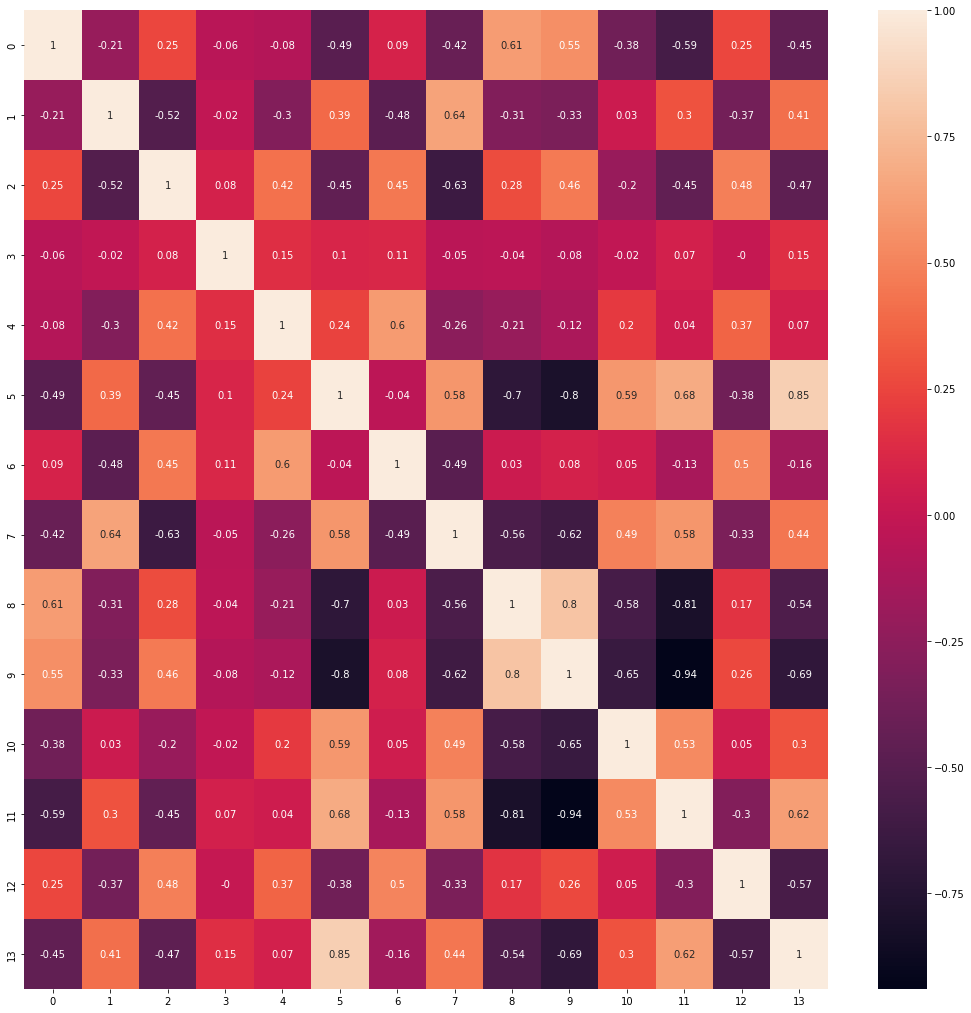

In [6]:
cor = df.corr().round(2)
plt.figure(figsize=(18,18))
sns.heatmap(data=cor,annot=True) #sns: seaborn
plt.show()

# Data splitting

In [7]:
X_new=df[[5,9,11,12,8]] # columns 5,9,11,12,,8 give most affecting feature data
X_new

,5,9,11,12,8
0,0.013134,0.591265,0.792814,0.009948,0.001998
1,0.013588,0.512112,0.839907,0.019342,0.004232
2,0.015379,0.517974,0.840809,0.008626,0.004281
3,0.015319,0.485964,0.863856,0.006436,0.006567
4,0.015539,0.482675,0.862945,0.011589,0.006523
...,...,...,...,...,...
501,0.013624,0.564130,0.810012,0.019982,0.002066
502,0.012517,0.558335,0.811733,0.018570,0.002045
503,0.014193,0.555433,0.807514,0.011475,0.002035
504,0.013913,0.559045,0.805701,0.013270,0.002048


In [8]:
Y = df[13]
X_train, X_test, Y_train, Y_test = train_test_split(X_new,Y, test_size = 0.2, random_state=5, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 5)
(102, 5)
(404,)
(102,)


# Linear regression

In [9]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, Y_train) #training

LinearRegression()

In [10]:
y_pred = regr.predict(X_test)

print(len(y_pred)) 
print(y_pred[0:4])

102
[0.07884965 0.06323426 0.05364095 0.00291903]


In [11]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
#score=r2_score(Y_test,y_pred)
print('r2 socre = ',r2_score(Y_test,y_pred))
print('mean_sqrd_error is= ',mean_squared_error(Y_test,y_pred))
print('root_mean_squared error= ',np.sqrt(mean_squared_error(Y_test,y_pred)))

r2 socre =  0.8316806022351187
mean_sqrd_error is=  7.045038401165326e-05
root_mean_squared error=  0.0083934727027407


# Random forest

In [12]:
from sklearn.ensemble import RandomForestRegressor

model_ranfor = RandomForestRegressor(n_estimators=100, random_state=42)
model_ranfor.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [13]:
y_pred_ranfor = model_ranfor.predict(X_test)

print(len(y_pred_ranfor)) 
print(y_pred_ranfor[0:4])

102
[0.08767654 0.06125598 0.04681348 0.01186295]


In [14]:
print('r2 socre = ',r2_score(Y_test,y_pred_ranfor))
print('mean_sqrd_error is= ',mean_squared_error(Y_test,y_pred_ranfor))
print('root_mean_squared error= ',np.sqrt(mean_squared_error(Y_test,y_pred_ranfor)))

r2 socre =  0.9227547612261042
mean_sqrd_error is=  3.2331132400404956e-05
root_mean_squared error=  0.005686047168323963


# Gradient boosting

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

model_grad = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_grad.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=42)

In [16]:
y_pred_grad = model_grad.predict(X_test)

print(len(y_pred_grad)) 
print(y_pred_grad[0:4])

102
[0.08608417 0.06067959 0.04755651 0.00914989]


In [17]:
print('r2 socre = ',r2_score(Y_test,y_pred_grad))
print('mean_sqrd_error is= ',mean_squared_error(Y_test,y_pred_grad))
print('root_mean_squared error= ',np.sqrt(mean_squared_error(Y_test,y_pred_grad)))

r2 socre =  0.9279484314239591
mean_sqrd_error is=  3.015731247989968e-05
root_mean_squared error=  0.005491567397373875


# KNN

In [18]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [19]:
y_pred_knn = model_knn.predict(X_test)

print(len(y_pred_knn)) 
print(y_pred_knn[0:4])

102
[0.07920412 0.06040545 0.041112   0.01120715]


In [20]:
print('r2 socre = ',r2_score(Y_test,y_pred_knn))
print('mean_sqrd_error is= ',mean_squared_error(Y_test,y_pred_knn))
print('root_mean_squared error= ',np.sqrt(mean_squared_error(Y_test,y_pred_knn)))

r2 socre =  0.7883006889089784
mean_sqrd_error is=  8.860712407133318e-05
root_mean_squared error=  0.009413135719372858


# Evaluation

In [21]:
val_df = pd.DataFrame({'Actual': Y_test, 'lin_reg_Predicted': y_pred, 'ran_forest_predicted':y_pred_ranfor, 
                       'gradient_boosting_predicted':y_pred_grad, 'knn_predicted':y_pred_knn})
val_df.head()

,Actual,lin_reg_Predicted,ran_forest_predicted,gradient_boosting_predicted,knn_predicted
226,0.074650,0.078850,0.087677,0.086084,0.079204
292,0.058716,0.063234,0.061256,0.060680,0.060405
90,0.046916,0.053641,0.046813,0.047557,0.041112
373,0.017612,0.002919,0.011863,0.009150,0.011207
273,0.077315,0.078071,0.095548,0.089833,0.066445


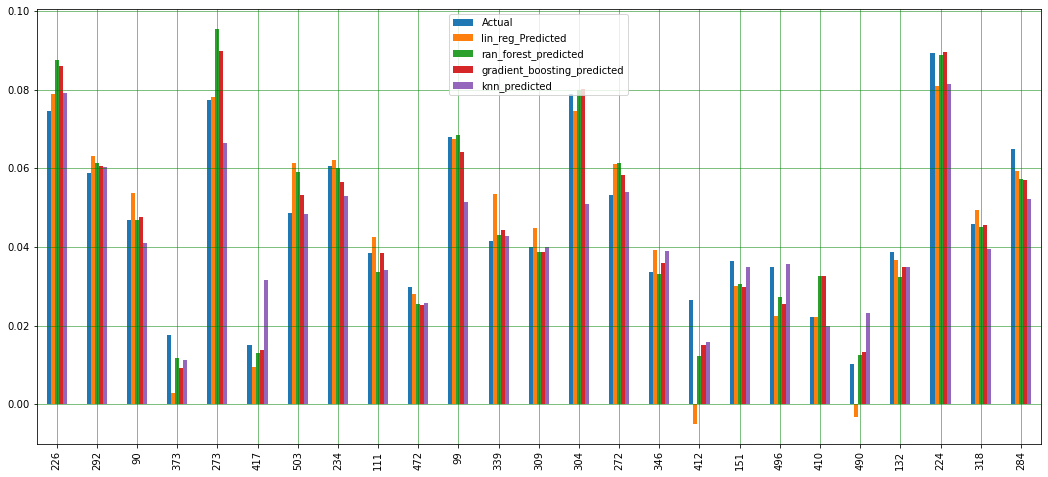

In [22]:
df1 = val_df.head(25)
df1.plot(kind='bar',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')# display grid lines for clarity

plt.show()